# Harvard Kennedy School Data Science Club

### Notebook done by Eric Englin

#### This dataset comes from the DonorsChoose.org Application Screening Challenge. Found at: https://www.kaggle.com/c/donorschoose-application-screening

In [1]:
import pandas as pd
train = pd.read_csv(r"/Users/ericenglin/Desktop/Data Science Club/Data/Donors Choose Screen/train.csv")

In [187]:
train.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0


In [118]:
train[['project_is_approved']].groupby(train['project_is_approved']).agg(['mean', 'count'])


project_is_approved        
                                   mean   count
project_is_approved                            
0                                     0   27734
1                                     1  154346

In [98]:
train.shape

(182080, 16)

In [99]:
# For our predictive model to be worth anything, we'll need to predict more than 84.7% correctly
# Because we could get 84.7% correct just by predicting that every project will be approved

154346/182080 #84.7%

0.8476823374340949

In [3]:
train.project_grade_category.unique()

array(['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'],
      dtype=object)

In [5]:
len(train.index)

182080

In [6]:
# Bringing in resources dataset 

resources = pd.read_csv(r"/Users/ericenglin/Desktop/Data Science Club/Data/Donors Choose Screen/resources.csv")

In [188]:
resources.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [8]:
len(resources.index)

1541272

In [189]:
# Want to aggregate this dataset so that we can join it with the training dataset

resource_new = resources.groupby(['id']).agg({
    'quantity':sum,
    'id':["count"],
    'price':sum})

resource_new.columns = ['total requested items', 'different items requests','cost requested']
resource_new.head(2)

,total requested items,different items requests,cost requested
id,,,
p000001,7,4,459.56
p000002,21,14,515.89


In [26]:
# Quality check
resource_new.describe()

,total requested items,different items requests,cost requested
count,260115.000000,260115.000000,260115.000000
mean,16.949515,5.925348,297.950077
std,26.353225,8.324707,368.754986
min,1.000000,1.000000,0.660000
25%,4.000000,1.000000,104.745000
50%,9.000000,3.000000,206.020000
75%,21.000000,7.000000,379.640000
max,930.000000,100.000000,9999.000000


In [190]:
# Bring out id column so that we can join with the training dataset
# Data Note: Resources has info with both training and unknown test dataset, so we just want the training id's
resource_new['id'] = resource_new.index
resource_new.tail(2)

,total requested items,different items requests,cost requested,id
id,,,,
p260114,39,10,222.56,p260114
p260115,2,2,318.97,p260115


In [186]:
merge_train = pd.merge(train, resource_new, on='id') #merge on id
merge_train.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total requested items,different items requests,cost requested
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,6,2,299.98
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20,1,20.00


In [191]:
temp = merge_train[merge_train['project_is_approved']==0]
temp.head(15)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total requested items,different items requests,cost requested
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20,1,20.00
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,5,5,684.47
13,p173555,9b7f355e34bc9ca5740779b69ee14d8e,Mrs.,NY,2016-11-15 22:13:39,Grades 3-5,Literacy & Language,Literature & Writing,Extra! Extra! Read all about it!! We love to ...,"Each day my fifth graders walk into our \""home...",My students have had a taste of good reading! ...,NaN,NaN,"My students need good books, with life lessons...",5,0,143,7,42.53
19,p037127,b21174f6246deadc11c2157a958d7953,Mrs.,LA,2016-05-21 19:46:06,Grades PreK-2,"Applied Learning, Special Needs","Early Development, Special Needs",Success With Communication,"A preschool classroom, created to meet the nee...",When my students enter my classroom for the fi...,NaN,NaN,My students need manipulatives to pieces to gi...,34,0,13,10,272.90
30,p081434,17563b7d138a9ca1e7308f0f480e7d09,Ms.,NY,2016-12-06 21:19:44,Grades PreK-2,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Seating Like a Boss- Our 21st Century Room,"\""Great job buddy!\"" is something I hear every...",In order to promote essential learning skills ...,NaN,NaN,My students need an opportunity to sit and wor...,9,0,11,7,163.34
34,p139731,d89c560612543869db2ca395d5831759,Mr.,CA,2017-01-10 01:24:00,Grades PreK-2,"Health & Sports, Literacy & Language","Health & Wellness, Literature & Writing",Happy Healthy Kinderlandia,"ICS students are bilingual, biliterate, cultur...",Our mission for the 2016-2017 school-year is t...,NaN,NaN,My students need playground equipment to be ha...,2,0,11,6,592.31
42,p220000,87d06a109a06e632ddc1a94467cae00f,Ms.,IL,2017-03-01 20:52:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Let's Let Out Some S.T.E.A.M.,Can you remember the day you started kindergar...,"STEAM (Science, Technology, Engineering, Art, ...",NaN,NaN,My students need an opportunity to be great wi...,1,0,7,7,499.94
49,p040831,e255b61e3cebc0762903b3a8a66a7752,Mr.,CA,2016-10-12 03:28:39,Grades 6-8,Math & Science,Applied Sciences,Upgrade Mr. Tom's Science Class,My students come from a wide variety of backgr...,"Although we are in South City, after lunch the...",NaN,NaN,My students need access to improved technology...,2,0,6,5,525.23
56,p130035,a6f804e310b641879c24ee7a9d5f28d5,Ms.,TX,2017-04-03 18:48:07,Grades 9-12,Math & Science,Mathematics,Plotting flight patterns with Rockets!!!,My tenth grade is comprised of 30 amazing stud...,Our Students will build rockets and change cer...,NaN,NaN,My students need materials to do build rockets...,0,0,16,13,433.94
58,p069404,29cbf9bcad5e379cbc92f44434189657,Ms.,IL,2017-01-29 21:11:48,Grades 6-8,Literacy & Language,"Literacy, Literature & Writing","Opening Our Eyes: Local, National, and Global ...",Our school is working to create one of the few...,"My students understand, know, and live injusti...",NaN,NaN,My students need to reflect on injustices in t...,2,0,104,6,47.34


In [13]:
merge_train.describe()

,teacher_number_of_previously_posted_projects,project_is_approved,total requested items,different items requests,cost requested
count,182080.000000,182080.000000,182080.000000,182080.000000,182080.000000
mean,11.237055,0.847682,16.971447,5.941509,297.731304
std,28.016086,0.359330,26.241957,8.349074,366.718002
min,0.000000,0.000000,1.000000,1.000000,0.660000
25%,0.000000,1.000000,4.000000,1.000000,104.480000
50%,2.000000,1.000000,9.000000,3.000000,205.980000
75%,9.000000,1.000000,21.000000,7.000000,379.000000
max,451.000000,1.000000,930.000000,100.000000,9999.000000


In [14]:
merge_train.to_csv('merge_train.csv')

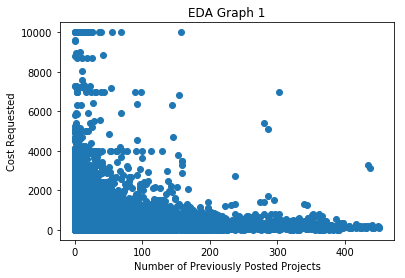

In [89]:
# Now that we have our dataset together, we want to do some more exploratory data analysis
# First area of exploration: Those that post a lot tend to request less for each post

import matplotlib.pyplot  as plt
plt.scatter(merge_train['teacher_number_of_previously_posted_projects'],merge_train['cost requested'])
plt.title('EDA Graph 1')
plt.xlabel('Number of Previously Posted Projects')
plt.ylabel('Cost Requested')
plt.show()

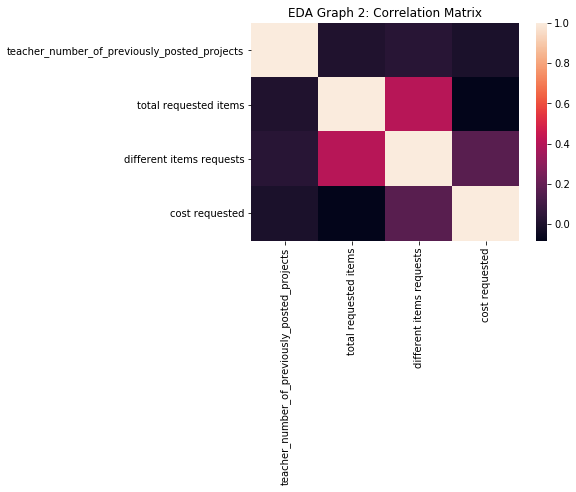

In [88]:
# We have 4 quantitative fields that may predict for a project getting approved
# Want to check if these are correlated with eachother

import seaborn as sb

sb.heatmap(merge_train.corr())  
plt.title('EDA Graph 2: Correlation Matrix')
plt.show()

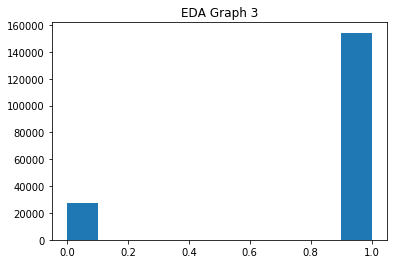

In [91]:
import matplotlib.pyplot as plt
plt.hist(merge_train['project_is_approved'])
plt.title("EDA Graph 3")
plt.show()

In [25]:
# Now want to eyeball test the how related project_is_approved is with our 4 fields

merge_train.groupby("project_is_approved").mean()

,teacher_number_of_previously_posted_projects,total requested items,different items requests,cost requested
project_is_approved,,,,
0,6.902791,20.261592,8.098796,357.596003
1,12.015867,16.380250,5.553872,286.974384


In [60]:
# Wondering whether it makes sense to make the project grade categories into dummy variables
# Looks like we could include this but doesn't seem like it makes a major difference between different grade groups

merge_train.groupby("project_grade_category").mean()

,teacher_number_of_previously_posted_projects,project_is_approved,total requested items,different items requests,cost requested
project_grade_category,,,,,
Grades 3-5,10.440615,0.853977,17.423073,5.772786,281.504519
Grades 6-8,10.762209,0.843459,21.359187,5.761109,291.319098
Grades 9-12,9.519742,0.835236,22.288078,5.616842,339.286663
Grades PreK-2,12.508689,0.847124,13.602504,6.231655,303.426058


In [101]:
merge_train['cost requested']= merge_train['cost requested'].astype('int64')
merge_train['project_is_approved']= merge_train['project_is_approved'].astype('int64')

In [102]:
import numpy as np
from sklearn.model_selection import train_test_split

cols=['total requested items','different items requests',
      'teacher_number_of_previously_posted_projects', 'cost requested'] 


merge_train2 = merge_train[cols]

y=merge_train['project_is_approved']
X_train, X_test, y_train, y_test = train_test_split(merge_train2, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(127456, 4) (127456,)
(54624, 4) (54624,)


In [103]:
X_train.dtypes

total requested items                           int64
different items requests                        int64
teacher_number_of_previously_posted_projects    int64
cost requested                                  int64
dtype: object

In [104]:
y_train.describe()

count    127456.000000
mean          0.848010
std           0.359012
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: project_is_approved, dtype: float64

In [105]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.514216
         Iterations 7
                                       Results: Logit
Model:                      Logit                       Pseudo R-squared:         -0.207     
Dependent Variable:         project_is_approved         AIC:                      131087.7968
Date:                       2019-02-20 21:15            BIC:                      131126.8189
No. Observations:           127456                      Log-Likelihood:           -65540.    
Df Model:                   3                           LL-Null:                  -54315.    
Df Residuals:               127452                      LLR p-value:              1.0000     
Converged:                  1.0000                      Scale:                    1.0000     
No. Iterations:             7.0000                                                           
--------------------------------------------------------------------------------------------

In [106]:
X_train.isnull().values.any()
y_train.isnull().values.any()

False

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test))) #85% 

Accuracy of logistic regression classifier on test set: 0.846


In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   27  8296]
 [   93 46208]]


In [112]:
(27 + 46208)/(27 + 46208 + 8296 + 93)

0.8464228178090216

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.00      0.01      8323
           1       0.85      1.00      0.92     46301

   micro avg       0.85      0.85      0.85     54624
   macro avg       0.54      0.50      0.46     54624
weighted avg       0.75      0.85      0.78     54624



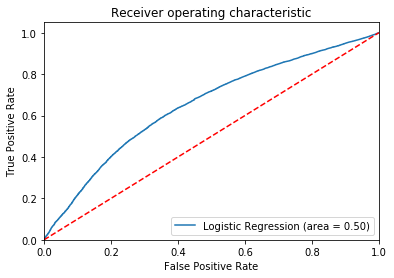

In [111]:
# ROC curve
# We want this curve to hit the upper left hand corner
# Very bad if it is hitting the dotted red line because that means our predictions aren't worth much at all! 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# How'd We Do?

#### Not great! We would actually be better off just approving every applicant that sends in a request. This means that we need to think more about why certain applicants are being turned down because we are not getting that information covered in our model yet! 


### Questions to Explore Further
 <br>
 <li> <em>Teacher Prefix</em>: Do the Mr's get all the donations? </li>
 <li> <em>State</em>: Do all of the donors are from California and want to donate locally?</li>
 <li> <em>Essay Responses</em>: Can we look at reading level to pick out the non-approved projects?</li>
 <li> <em>Project Categories</em>: Are there certain categories that almost never get approved?</li>
 <li> <em>Model Type</em>: Is there a better type of model to use here? Maybe random forest?</li>

In [202]:
# Eyeball checking some of the projects that didn't get approved
# To get a better model, these are the kinds of projects that we'll need to pick out
temp = merge_train[merge_train['project_is_approved']==0]
temp.head(15)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total requested items,different items requests,cost requested
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20,1,20.00
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,5,5,684.47
13,p173555,9b7f355e34bc9ca5740779b69ee14d8e,Mrs.,NY,2016-11-15 22:13:39,Grades 3-5,Literacy & Language,Literature & Writing,Extra! Extra! Read all about it!! We love to ...,"Each day my fifth graders walk into our \""home...",My students have had a taste of good reading! ...,NaN,NaN,"My students need good books, with life lessons...",5,0,143,7,42.53
19,p037127,b21174f6246deadc11c2157a958d7953,Mrs.,LA,2016-05-21 19:46:06,Grades PreK-2,"Applied Learning, Special Needs","Early Development, Special Needs",Success With Communication,"A preschool classroom, created to meet the nee...",When my students enter my classroom for the fi...,NaN,NaN,My students need manipulatives to pieces to gi...,34,0,13,10,272.90
30,p081434,17563b7d138a9ca1e7308f0f480e7d09,Ms.,NY,2016-12-06 21:19:44,Grades PreK-2,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Seating Like a Boss- Our 21st Century Room,"\""Great job buddy!\"" is something I hear every...",In order to promote essential learning skills ...,NaN,NaN,My students need an opportunity to sit and wor...,9,0,11,7,163.34
34,p139731,d89c560612543869db2ca395d5831759,Mr.,CA,2017-01-10 01:24:00,Grades PreK-2,"Health & Sports, Literacy & Language","Health & Wellness, Literature & Writing",Happy Healthy Kinderlandia,"ICS students are bilingual, biliterate, cultur...",Our mission for the 2016-2017 school-year is t...,NaN,NaN,My students need playground equipment to be ha...,2,0,11,6,592.31
42,p220000,87d06a109a06e632ddc1a94467cae00f,Ms.,IL,2017-03-01 20:52:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Let's Let Out Some S.T.E.A.M.,Can you remember the day you started kindergar...,"STEAM (Science, Technology, Engineering, Art, ...",NaN,NaN,My students need an opportunity to be great wi...,1,0,7,7,499.94
49,p040831,e255b61e3cebc0762903b3a8a66a7752,Mr.,CA,2016-10-12 03:28:39,Grades 6-8,Math & Science,Applied Sciences,Upgrade Mr. Tom's Science Class,My students come from a wide variety of backgr...,"Although we are in South City, after lunch the...",NaN,NaN,My students need access to improved technology...,2,0,6,5,525.23
56,p130035,a6f804e310b641879c24ee7a9d5f28d5,Ms.,TX,2017-04-03 18:48:07,Grades 9-12,Math & Science,Mathematics,Plotting flight patterns with Rockets!!!,My tenth grade is comprised of 30 amazing stud...,Our Students will build rockets and change cer...,NaN,NaN,My students need materials to do build rockets...,0,0,16,13,433.94
58,p069404,29cbf9bcad5e379cbc92f44434189657,Ms.,IL,2017-01-29 21:11:48,Grades 6-8,Literacy & Language,"Literacy, Literature & Writing","Opening Our Eyes: Local, National, and Global ...",Our school is working to create one of the few...,"My students understand, know, and live injusti...",NaN,NaN,My students need to reflect on injustices in t...,2,0,104,6,47.34


In [197]:
# Teacher prefix EDA
df_agg1 = train[['project_is_approved']].groupby(train['teacher_prefix']).agg(['mean', 'count'])
df_agg1['non-approvals']=df_agg1[('project_is_approved', 'count')]*(1-df_agg1[('project_is_approved', 'mean')])
df_agg1.sort_values([('project_is_approved', 'count')],ascending=False)

# Data caveat: 
# Because we are making 2 columns in aggregation, we get a multi index
# To sort this, we need to contain the tuple describing the column inside a list
# You do this by closing the 2 fields, project_is_approved & mean, within a set of parentheses

project_is_approved        non-approvals
                              mean  count              
teacher_prefix                                         
Mrs.                      0.854085  95405       13921.0
Ms.                       0.843052  65066       10212.0
Mr.                       0.842022  17667        2791.0
Teacher                   0.794223   3912         805.0
Dr.                       0.807692     26           5.0

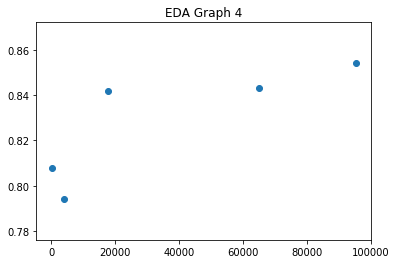

In [199]:
x1 = df_agg1[('project_is_approved', 'count')]
y1 = df_agg1[('project_is_approved', 'mean')]
plt.scatter(x1,y1)
plt.title("EDA Graph 4")
plt.show()

In [200]:
#State EDA

df_agg2 = train[['project_is_approved']].groupby(train['school_state'], sort=False).agg(['mean', 'count'])
df_agg2['non-approvals']=df_agg2[('project_is_approved', 'count')]*(1-df_agg2[('project_is_approved', 'mean')])
df_agg2 = df_agg2.sort_values([('project_is_approved', 'count')],ascending=False)
df_agg2.head(15)

project_is_approved        non-approvals
                            mean  count              
school_state                                         
CA                      0.856431  25695        3689.0
TX                      0.815670  12304        2268.0
NY                      0.853582  12157        1780.0
FL                      0.824500  10359        1818.0
NC                      0.853480   8463        1240.0
IL                      0.853792   7332        1072.0
GA                      0.834087   6636        1101.0
SC                      0.864923   6463         873.0
MI                      0.844478   5324         828.0
PA                      0.852543   5093         751.0
IN                      0.847937   4314         656.0
MO                      0.857547   4247         605.0
OH                      0.871467   4139         532.0
MA                      0.860138   4054         567.0
LA                      0.834009   3946         655.0

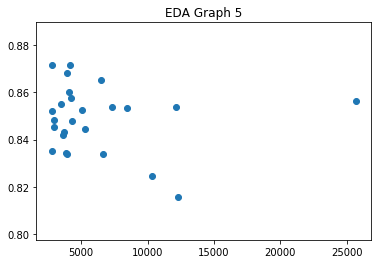

In [172]:
df_agg2new= df_agg2[df_agg2[('project_is_approved', 'count')] > 2500]

x2 = df_agg2new[('project_is_approved', 'count')]
y2 = df_agg2new[('project_is_approved', 'mean')]
plt.scatter(x2,y2)
plt.title("EDA Graph 5")
plt.show()

In [201]:
# Project category EDA

df_agg3 = train[['project_is_approved']].groupby(train['project_subject_categories']).agg(['mean', 'count'])
df_agg3['non-approvals']=df_agg3[('project_is_approved', 'count')]*(1-df_agg3[('project_is_approved', 'mean')])
df_agg3 = df_agg3.sort_values([('project_is_approved', 'count')],ascending=False)
df_agg3.head(15)

project_is_approved        non-approvals
                                                     mean  count              
project_subject_categories                                                    
Literacy & Language                              0.869858  39257        5109.0
Math & Science                                   0.821082  28555        5109.0
Literacy & Language, Math & Science              0.867219  24499        3253.0
Health & Sports                                  0.846794  16951        2597.0
Music & The Arts                                 0.850006   8527        1279.0
Special Needs                                    0.809483   7065        1346.0
Literacy & Language, Special Needs               0.854450   6685         973.0
Applied Learning                                 0.814897   6310        1168.0
Math & Science, Literacy & Language              0.861046   3843         534.0
Applied Learning, Literacy & Language            0.861208   3725         517.0
History & Civics                                 0.831974   3065         515.0
Math & Science, Special Needs                    0.825581   3010         525.0
Literacy & Language, Music & The Arts            0.838777   2878         464.0
Math & Science, Music & The Arts                 0.827961   2761         475.0
Applied Learning, Special Needs                  0.811769   2481         467.0

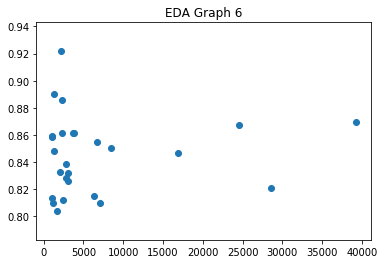

In [173]:
df_agg3new= df_agg3[df_agg3[('project_is_approved', 'count')] > 1000]
x3 = df_agg3new[('project_is_approved', 'count')]
y3 = df_agg3new[('project_is_approved', 'mean')]
plt.scatter(x3,y3)
plt.title("EDA Graph 6")
plt.show()

In [217]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [218]:
# Use the forest's predict method on the test data
y_pred_randomforest = rf.predict(X_test)


In [210]:
# Calculate the absolute errors
errors = abs(y_pred_randomforest - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Mean Absolute Error: 0.25.

Mean Absolute Error: 0.25 degrees.


In [219]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_randomforest)
print(confusion_matrix)

[[  911  7412]
 [ 2902 43399]]


In [220]:
(43399+911)/(43399+911+2902+7412) #81.1% correct

0.8111818980667839

In [221]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'

In [222]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

NameError: name 'feature_list' is not defined